## Computer Assignment #5 (Neural Networks)
### Artificial Intelligence Course - Spring 2021
### Daneshvar Amrollahi (810197685)

# Data Visualization 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
train_images_df = pd.read_csv("dataset/train_images.csv")
train_images_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [50]:
train_images_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,11,3,11,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,23,165,36,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,50,47,56,94,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,4,158,...,255,247,196,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,255,255,76,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_labels_df = pd.read_csv("dataset/train_labels.csv")
train_labels_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [141]:
train_labels_df

,label
0,19
1,7
2,4
3,15
4,12
...,...
59995,12
59996,15
59997,2
59998,7


In [142]:
test_images_df = pd.read_csv("dataset/test_images.csv")
test_images_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_images_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,147,...,30,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,3,100,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,31,218,43,0,0,...,20,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,9,213,253,97,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,50,182,...,67,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,255,255,203,16,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,3,143,254,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
test_labels_df = pd.read_csv("dataset/test_labels.csv")
test_labels_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [144]:
train_labels_df = train_labels_df.rename(columns={'0': 'label'})

In [145]:
test_labels_df = test_labels_df.rename(columns={'0': 'label'})

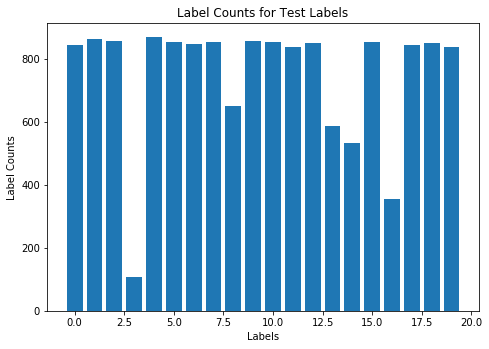

In [146]:
index, counts = np.unique(test_labels_df['label'].values, return_counts = True)
fig = plt.figure()
ax = fig.add_axes([0 ,0, 1, 1])
ax.bar(index ,counts)

plt.xlabel("Labels")
plt.ylabel("Label Counts")
plt.title("Label Counts for Test Labels")

plt.show()

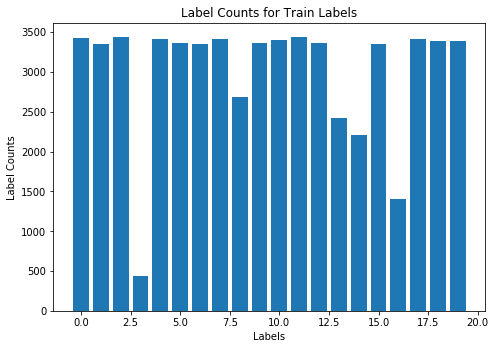

In [147]:
index, counts = np.unique(train_labels_df['label'].values, return_counts = True)
fig = plt.figure()
ax = fig.add_axes([0 ,0, 1, 1])
ax.bar(index ,counts)

plt.xlabel("Labels")
plt.ylabel("Label Counts")
plt.title("Label Counts for Train Labels")

plt.show()

In [156]:
train_labels_df

,label
0,19
1,7
2,4
3,15
4,12
...,...
59995,12
59996,15
59997,2
59998,7


#### Some random samples of the train dataframe:

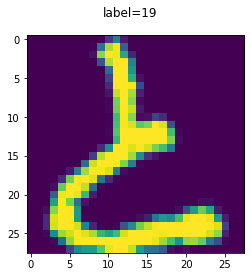

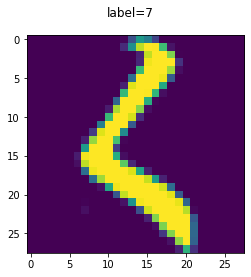

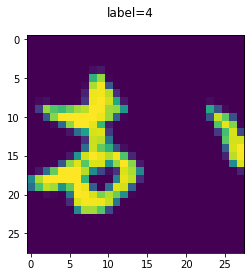

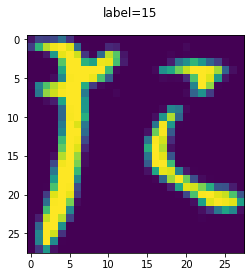

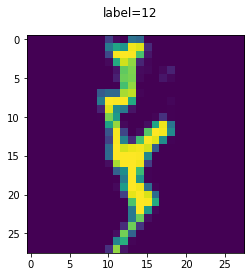

In [167]:
pixels = []
tags = []

for i in range(5):
    row = train_images_df.iloc[[i]]
    pixels.append(row)
    
tags = list(train_labels_df.head(10)["label"]) 

    
pixels = np.squeeze(pixels)

for i in range(5):
    fig = plt.figure()
    plt.imshow(pixels[i].reshape(28, 28))
    fig.suptitle(f'label={tags[i]}')
    plt.show()


# Data Normalization

In [59]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [60]:
test_images_df = normalize(test_images_df)
test_images_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.576471,...,0.117647,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.011765,0.392157,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.121569,0.854902,0.168627,0.000000,0.000000,...,0.078431,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.835294,0.992157,0.380392,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.196078,0.713725,...,0.262745,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,0.796078,0.062745,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.011765,0.560784,0.996078,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
train_images_df = normalize(train_images_df)
train_images_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.043137,0.011765,0.043137,0.007843,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.090196,0.647059,0.141176,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.05098,0.196078,0.184314,0.219608,0.368627,0.141176,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.015686,0.619608,...,1.000000,0.968627,0.768627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,0.298039,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Dataloader

In [63]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.onehot_labels = self.__onehot(labels, self.__n_classes)
        
    def __onehot(self, labels, n_classes):
        onehot_vectors = []
        for label in labels:
            cur = [0] * n_classes
            cur[int(label[0])] = 1
            onehot_vectors.append(cur)
        
        return onehot_vectors
    
    def __shuffle_dataset(self):
        pass
        # TODO: Implement
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.onehot_labels[idx:idx+self.__batch_size]))

``` 
for batch in trainloader:
    batch[0] is a matrix with BATH_SIZE rows and 784 columns. Each row is an image.

    batch[1] is a matrix with 20 columns and BATCH_SIZE rows. Each row is the one_hot vector
```


# Activation Functions

In [92]:
from copy import deepcopy

class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

    
class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        relu_value = np.array([np.array(x, copy=True) for x in matrix])
        relu_value[relu_value < 0] = 0
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.array([np.array(x, copy=True) for x in matrix])
        relu_derivative[relu_derivative < 0] = 0
        relu_derivative[relu_derivative > 0] = 1
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        leacky_relu_value = np.array([np.array(x, copy=True) for x in matrix])
        return np.where(leacky_relu_value > 0, leacky_relu_value, leacky_relu_value * 0.01)       

    def derivative(self, matrix):
        leacky_relu_derivative = np.array([np.array(x, copy=True) for x in matrix])
        return np.where(leacky_relu_derivative > 0, 1, 0.01)  
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        return 1.0 / (1.0 + np.exp(-matrix))

    def derivative(self, matrix):
        sigmoid_value = self.__val(matrix)
        sigmoid_derivative = np.multiply(sigmoid_value, 1 - sigmoid_value)
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix, axis = -1):
    
        softmax_value = np.zeros(matrix.shape)
        for i in range(len(matrix)):
            softmax_value[i] = np.exp(matrix[i] - np.max(matrix[i]))
            softmax_value[i] = softmax_value[i] / np.sum(softmax_value[i])
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        return np.tanh(matrix)
        #return (np.exp(matrix) - np.exp(-matrix)) / (np.exp(matrix) + np.exp(-matrix))

    def derivative(self, matrix):
        return 1 - np.multiply(matrix, matrix)
    
    def __call__(self, matrix):
        return self.__val(matrix)

### Activation Functions Correctness Check:

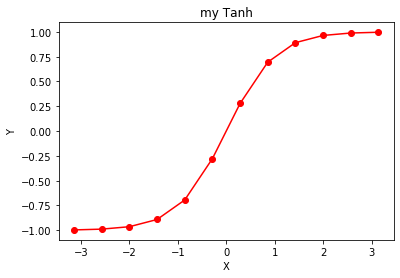

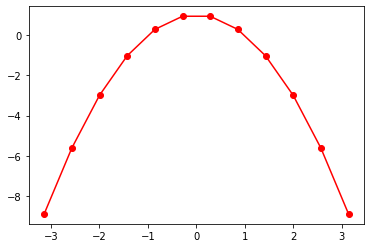

In [66]:
test = np.linspace(-np.pi, np.pi, 12)
tanh = Tanh()
ans = tanh(test)

plt.plot(test, ans, color = 'red', marker = "o")
plt.title("my Tanh")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ans = tanh.derivative(test)
plt.plot(test, ans, color = 'red', marker = "o")

plt.show()

In [19]:
test = np.array([[-1, 2, -3], [4, -5, 6]])
print(test)

print()
relu = Relu()
print(relu(test))
print(relu.derivative(test))

print()
sigmoid = Sigmoid()
print(sigmoid(test))
print(sigmoid.derivative(test))

print()
leakyRelu =  LeakyRelu()
print(leakyRelu(test))
print(leakyRelu.derivative(test))

[[-1  2 -3]
 [ 4 -5  6]]

[[0 2 0]
 [4 0 6]]
[[0 1 0]
 [1 0 1]]

[[0.26894142 0.88079708 0.04742587]
 [0.98201379 0.00669285 0.99752738]]
[[0.19661193 0.10499359 0.04517666]
 [0.01766271 0.00664806 0.00246651]]

[[-0.01  2.   -0.03]
 [ 4.   -0.05  6.  ]]
[[0.01 1.   0.01]
 [1.   0.01 1.  ]]


# Loss Function

In [21]:
class CrossEntropy: 
    
    EPS = 1e-50
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        
        
        cross_entropy_value = np.multiply(-expected_val, np.log(np.clip(softmax(true_val), self.EPS, 1 - self.EPS))).sum(axis = 1) 
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        
        return softmax(true_val + self.EPS) - expected_val
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

### Cross Entropy Correctness Check:

In [22]:
crossEntropy = CrossEntropy()

predicted = np.array([[12345, 67890, 99]])
ans = np.array([[0, 0, 1]])

print(crossEntropy(predicted, ans))

predicted = np.array([[12345, 67890, 99999999]])
print(crossEntropy(predicted, ans))


print(crossEntropy(np.array([[0, 0, 1], [1, 0, 0], [1, 0, 0]]), np.array([[0, 0, 1], [0, 0, 1], [0.5, 0.5, 0]])))


[115.12925465]
[0.]
[0.55144471 1.55144471 1.05144471]


# Layer

In [23]:
import math

class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = layer_input
        self.__last_activation_input =  layer_input @ self.weight + self.bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = np.squeeze(self.activation.derivative(self.__last_activation_input))
        
        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        
        backprop_tensor = np.squeeze(backprop_tensor)
        
        
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        
        xt = self.__last_input.transpose()
        
        yp = np.multiply(backprop_tensor, self.__last_activation_derivative)
        
        bt = np.matrix(np.tile(1, (1, yp.shape[0])))
        

        wp = np.matmul(xt, yp)
        bp = np.matmul(bt, yp)
        
        backprop_tensor = np.matmul(yp, self.__weight.transpose())
        
        self.__weight -= wp * lr
        self.__bias -= bp * lr
        
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']

        weights = np.random.uniform(low = low, high = high, size = (dim1, dim2))

        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
            
            
        weights = np.random.normal(loc = mean, scale = math.sqrt(var), size=(dim1, dim2))
        
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [24]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        
        
        self.__layers_list.append(new_layer)
        
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), learning_rate = 1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = learning_rate
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        
        network_output = deepcopy(network_input)
        
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
            network_output = np.squeeze(network_output)
            
    
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        
        output_batch = self.forward(x_batch)
        
        batch_accuracy = self.__compute_accuracy(output_batch, y_batch)
        
        batch_average_loss = self.__update_weights(output_batch, y_batch)
        
        return (batch_accuracy, batch_average_loss)
        
        
        
    def __test_on_batch(self, x_batch, y_batch):
        output_batch = self.forward(x_batch)
        
        cross_entropy = CrossEntropy()
        batch_average_loss = np.sum(cross_entropy(output_batch, y_batch)) / len(output_batch)
        
        batch_accuracy = self.__compute_accuracy(output_batch, y_batch)
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        
        labels = self.__get_labels(output)
    
        correct = 0
        for i in range(len(output)):
            
            if (expected_output[i, labels[i]] == 1):
                correct += 1
                
        return correct / len(output)
    
    
    def __update_weights(self, output, y_train):
        crossEntropy = CrossEntropy()
        
        d = crossEntropy.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
             d = layer.update_weights(d, self.__lr)
            
        return np.sum(crossEntropy(output, y_train)) / len(output)

In [27]:
BATCH_SIZE = 64

x = train_labels_df.values.tolist()

In [28]:
print(len(x))
print(x[:10])

60000
[[19], [7], [4], [15], [12], [13], [10], [0], [19], [2]]


# Training Sample Code

In [29]:
TRAINLOADER = Dataloader(data = train_images_df.values.tolist(), labels = train_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_images_df.values.tolist(), labels = test_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

### Initial Run:

**EPOCHS**: 20

**Layers**:

|              | neurons     | activation |init weights|
| -----------  | ----------- |------------|------------|
| Input        | 784         | Relu       |Uniform     | 
| Hidden 1     | 16          |     Relu   |     Uniform|
| Hidden 2     |   16        |  Relu      |     Uniform|
| Output       |   20        |Identical   |     Uniform|

**LEARNING_RATE** = 0.001


In [34]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.15644989339019189	Average Loss: 2.6007119275178874
	Test: Average Accuracy: 0.2059397163120567	Average Loss: 2.369140937581629
Epoch 2:
	Train: Average Accuracy: 0.4709321695095949	Average Loss: 1.7048972144246761
	Test: Average Accuracy: 0.474468085106383	Average Loss: 1.7884312247546057
Epoch 3:
	Train: Average Accuracy: 0.6535847547974414	Average Loss: 1.1738468248538305
	Test: Average Accuracy: 0.5911347517730497	Average Loss: 1.4190390901368641
Epoch 4:
	Train: Average Accuracy: 0.7281283315565032	Average Loss: 0.9442602021855095
	Test: Average Accuracy: 0.6457890070921987	Average Loss: 1.2624149982456228
Epoch 5:
	Train: Average Accuracy: 0.7677405383795309	Average Loss: 0.8148377140196627
	Test: Average Accuracy: 0.6796099290780141	Average Loss: 1.1690310118172154
Epoch 6:
	Train: Average Accuracy: 0.7922607942430704	Average Loss: 0.7317432082617603
	Test: Average Accuracy: 0.6931515957446809	Average Loss: 1.1176221559751969
Epoch 7:
	Train: 

#### What would happen if all weights were initially set to 0?

If all the weights are initialized to zeros, the derivatives will remain same. As a result, neurons will learn same features in each iterations. This problem is known as network failing to break symmetry. And not only zero, any constant initialization will produce a poor result.


### Too High Learning Rate Impact:

Here we test the network's output with **Learning Rate = 0.01** which is 10 times more than the previous one:

In [36]:
LEARNING_RATE = 0.01

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.2921608475479744	Average Loss: 2.2407592185092216
	Test: Average Accuracy: 0.3351285460992908	Average Loss: 2.1868145000236594
Epoch 2:
	Train: Average Accuracy: 0.38892590618336886	Average Loss: 1.85814489348723
	Test: Average Accuracy: 0.3593306737588653	Average Loss: 2.0200096185938516
Epoch 3:
	Train: Average Accuracy: 0.4075826226012793	Average Loss: 1.8403739505434522
	Test: Average Accuracy: 0.3406693262411347	Average Loss: 2.2612666777062627
Epoch 4:
	Train: Average Accuracy: 0.4250066631130064	Average Loss: 1.8166233895217667
	Test: Average Accuracy: 0.33260195035461	Average Loss: 2.170399926458565
Epoch 5:
	Train: Average Accuracy: 0.3949060501066098	Average Loss: 1.8776600744987066
	Test: Average Accuracy: 0.33519503546099294	Average Loss: 2.1645849035885294
Epoch 6:
	Train: Average Accuracy: 0.3663879264392324	Average Loss: 1.919330675071812
	Test: Average Accuracy: 0.27969858156028365	Average Loss: 2.243548452933924
Epoch 7:
	Train: Ave

As it can be seen, there is no progress in the accuracy of the network after many iterations. The reason is that:

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution. If the step size is too large, it can **jump over the minima we are trying to reach**, ie. we **overshoot**. This can lead to osculations around the minimum or in some cases to outright divergence.

### Too Small Learning Rate Impact:

Now we test the network's output with **Learning Rate = 0.0001** which is 10 times less than the previous one:

In [37]:
LEARNING_RATE = 0.0001

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.1841851012793177	Average Loss: 2.361480530514004
	Test: Average Accuracy: 0.16879432624113477	Average Loss: 2.5106846880457434
Epoch 2:
	Train: Average Accuracy: 0.18933235607675905	Average Loss: 2.3502770250815352
	Test: Average Accuracy: 0.16850620567375885	Average Loss: 2.508164503696295
Epoch 3:
	Train: Average Accuracy: 0.1886993603411514	Average Loss: 2.3453009913181204
	Test: Average Accuracy: 0.16832890070921988	Average Loss: 2.504150327926679
Epoch 4:
	Train: Average Accuracy: 0.18779984008528786	Average Loss: 2.342110530038092
	Test: Average Accuracy: 0.16892730496453903	Average Loss: 2.5023383996468618
Epoch 5:
	Train: Average Accuracy: 0.18746668443496803	Average Loss: 2.339914845909795
	Test: Average Accuracy: 0.168395390070922	Average Loss: 2.5008977343674017
Epoch 6:
	Train: Average Accuracy: 0.1865671641791045	Average Loss: 2.3377774870389274
	Test: Average Accuracy: 0.1674645390070922	Average Loss: 2.4998946089482024
Epoch 7:
	Train

A learning rate that is too small may never converge or may **get stuck on a suboptimal solution**.

### Sigmoid Activation Function:

In [83]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = Sigmoid(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = Sigmoid(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.05525386460554371	Average Loss: 2.9531939974952177
	Test: Average Accuracy: 0.05680407801418439	Average Loss: 2.9493210938140644
Epoch 2:
	Train: Average Accuracy: 0.056319962686567165	Average Loss: 2.950765607043091
	Test: Average Accuracy: 0.07282801418439717	Average Loss: 2.949127743140371
Epoch 3:
	Train: Average Accuracy: 0.05655317164179104	Average Loss: 2.9505554865720947
	Test: Average Accuracy: 0.065625	Average Loss: 2.948948764463147
Epoch 4:
	Train: Average Accuracy: 0.05690298507462686	Average Loss: 2.950300252059465
	Test: Average Accuracy: 0.055895390070921994	Average Loss: 2.9486907162512574
Epoch 5:
	Train: Average Accuracy: 0.05818563432835821	Average Loss: 2.9498180016921207
	Test: Average Accuracy: 0.0581781914893617	Average Loss: 2.948132869180893
Epoch 6:
	Train: Average Accuracy: 0.061517190831556504	Average Loss: 2.948601627143113
	Test: Average Accuracy: 0.0692154255319149	Average Loss: 2.9466286258657
Epoch 7:
	Train: Averag

As it can be seen, the **Sigmoid** functino doesn't seem to be giving us good results as **Relu**. The reason is this:

The bigger the input (in absolute value) the smaller the gradient of the sigmoid function. But, probably an even more important effect is that the derivative of the sigmoid function is ALWAYS smaller than one. In fact it is at most 0.25! 

The down side of this is that if you have many layers, you will multiply these gradients, and the product of many smaller than 1 values goes to zero very quickly.

Source: https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks

### Hyperbolic Tangent Activation Function:

**Disadvantages**:

1. More computation expensive than sigmoid function.
2. Suffers with gradient vanishing.

### Leaky Relu Activation Function:

In [94]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = LeakyRelu(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = LeakyRelu(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.16254664179104478	Average Loss: 2.594992643012774
	Test: Average Accuracy: 0.25511968085106385	Average Loss: 2.271591664962809
Epoch 2:
	Train: Average Accuracy: 0.48012726545842216	Average Loss: 1.7236395645115818
	Test: Average Accuracy: 0.49406028368794325	Average Loss: 1.730029276453238
Epoch 3:
	Train: Average Accuracy: 0.6610474413646056	Average Loss: 1.1555360130784045
	Test: Average Accuracy: 0.5984264184397162	Average Loss: 1.3678372519123372
Epoch 4:
	Train: Average Accuracy: 0.7344582889125799	Average Loss: 0.9276454432124895
	Test: Average Accuracy: 0.6547207446808511	Average Loss: 1.205069887228231
Epoch 5:
	Train: Average Accuracy: 0.7730710287846482	Average Loss: 0.7966147990379857
	Test: Average Accuracy: 0.6838652482269503	Average Loss: 1.1223586259621654
Epoch 6:
	Train: Average Accuracy: 0.7952258795309168	Average Loss: 0.7239457455057218
	Test: Average Accuracy: 0.6975398936170213	Average Loss: 1.080581001978909
Epoch 7:
	Train: 

Leaky ReLU has two benefits over ReLU:

1. It fixes the **“dying ReLU” problem** (ReLU neurons become inactive and only output 0 for any input), as it doesn’t have zero-slope parts
2. It speeds up training. There is evidence that having the “mean activation” be close to 0 makes training faster. 

### Batch Size Impact

We try 3 batch sizes other than 64 here:
1. 16
2. 32
3. 256

In [102]:
BATCH_SIZE = 16

TRAINLOADER = Dataloader(data = train_images_df.values.tolist(), labels = train_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_images_df.values.tolist(), labels = test_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

In [103]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.15493333333333334	Average Loss: 2.6329516675776987
	Test: Average Accuracy: 0.25086620469083154	Average Loss: 2.3018383961687805
Epoch 2:
	Train: Average Accuracy: 0.5148	Average Loss: 1.6003441532465144
	Test: Average Accuracy: 0.533382196162047	Average Loss: 1.6156920126775847
Epoch 3:
	Train: Average Accuracy: 0.68375	Average Loss: 1.0968698186807184
	Test: Average Accuracy: 0.6114738805970149	Average Loss: 1.357388674338265
Epoch 4:
	Train: Average Accuracy: 0.7380666666666666	Average Loss: 0.9204536410952932
	Test: Average Accuracy: 0.6487206823027718	Average Loss: 1.2339844745734145
Epoch 5:
	Train: Average Accuracy: 0.7690333333333333	Average Loss: 0.8147986511096688
	Test: Average Accuracy: 0.6770389125799574	Average Loss: 1.1540195543726666
Epoch 6:
	Train: Average Accuracy: 0.79015	Average Loss: 0.7425502521590184
	Test: Average Accuracy: 0.695362473347548	Average Loss: 1.097732588645471
Epoch 7:
	Train: Average Accuracy: 0.804033333333333

In [104]:
BATCH_SIZE = 32

TRAINLOADER = Dataloader(data = train_images_df.values.tolist(), labels = train_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_images_df.values.tolist(), labels = test_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

In [105]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.16406666666666667	Average Loss: 2.588016563203567
	Test: Average Accuracy: 0.25224324804548687	Average Loss: 2.27489944917599
Epoch 2:
	Train: Average Accuracy: 0.4942666666666667	Average Loss: 1.6581054007466074
	Test: Average Accuracy: 0.49904495380241654	Average Loss: 1.7133881649132796
Epoch 3:
	Train: Average Accuracy: 0.6545666666666666	Average Loss: 1.1823671884471836
	Test: Average Accuracy: 0.5965929282160625	Average Loss: 1.3902505564214616
Epoch 4:
	Train: Average Accuracy: 0.7289833333333333	Average Loss: 0.9535431850902056
	Test: Average Accuracy: 0.6440787135749823	Average Loss: 1.2464486022718402
Epoch 5:
	Train: Average Accuracy: 0.7691333333333333	Average Loss: 0.8197527831200714
	Test: Average Accuracy: 0.6746624022743426	Average Loss: 1.1473077753093524
Epoch 6:
	Train: Average Accuracy: 0.7933333333333333	Average Loss: 0.7433894973401992
	Test: Average Accuracy: 0.685723169864961	Average Loss: 1.1100895217875657
Epoch 7:
	Train: 

In [106]:
BATCH_SIZE = 256

TRAINLOADER = Dataloader(data = train_images_df.values.tolist(), labels = train_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_images_df.values.tolist(), labels = test_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

In [107]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.13274601063829788	Average Loss: 2.6941009523360275
	Test: Average Accuracy: 0.21623062555753791	Average Loss: 2.4399860213342497
Epoch 2:
	Train: Average Accuracy: 0.4373005319148936	Average Loss: 1.8102087597717935
	Test: Average Accuracy: 0.4962052575825156	Average Loss: 1.7164040538034446
Epoch 3:
	Train: Average Accuracy: 0.655324689716312	Average Loss: 1.1827278614583197
	Test: Average Accuracy: 0.5984054415700268	Average Loss: 1.363571384915894
Epoch 4:
	Train: Average Accuracy: 0.7216312056737588	Average Loss: 0.9603960976961776
	Test: Average Accuracy: 0.644053858162355	Average Loss: 1.2375546476884722
Epoch 5:
	Train: Average Accuracy: 0.7534962322695035	Average Loss: 0.8493931179492823
	Test: Average Accuracy: 0.6652193911685995	Average Loss: 1.1692851125917092
Epoch 6:
	Train: Average Accuracy: 0.7734208776595745	Average Loss: 0.7790940651681582
	Test: Average Accuracy: 0.6823985280999109	Average Loss: 1.1191591772314902
Epoch 7:
	Train: 

A **smaller batch size**, increases the number of forward/backward propagations, leading to a **slower neural network**. Also it leads to a **higher variance**, due to smaller number of training samples. 

#### Why use batches?

It requires **less memory**. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.


### Epoch Impact

#### Why use multiple epochs?

We are using a limited dataset and to optimise the learning and the graph we are using Gradient Descent which is an iterative process. So, updating the weights with single pass or one epoch is not enough. 

As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from **underfitting** to optimal to overfitting

In [113]:
BATCH_SIZE = 64

TRAINLOADER = Dataloader(data = train_images_df.values.tolist(), labels = train_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_images_df.values.tolist(), labels = test_labels_df.values.tolist(), n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

In [114]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20


network = FeedForwardNN(INPUT_SHAPE)


network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 16, activation = Relu(), weight_initializer='uniform')

network.add_layer(n_neurons = 20, activation = Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.15538379530916843	Average Loss: 2.613205540369536
	Test: Average Accuracy: 0.20675975177304967	Average Loss: 2.3691979760689352
Epoch 2:
	Train: Average Accuracy: 0.45973813965884863	Average Loss: 1.7479405828664443
	Test: Average Accuracy: 0.5026595744680851	Average Loss: 1.7294776818094195
Epoch 3:
	Train: Average Accuracy: 0.6551672441364605	Average Loss: 1.1864285393728937
	Test: Average Accuracy: 0.5914228723404256	Average Loss: 1.428925255495158
Epoch 4:
	Train: Average Accuracy: 0.7271788379530917	Average Loss: 0.9599695854615322
	Test: Average Accuracy: 0.6405806737588652	Average Loss: 1.2724313609379878
Epoch 5:
	Train: Average Accuracy: 0.7680903518123667	Average Loss: 0.8223274776587995
	Test: Average Accuracy: 0.6755762411347519	Average Loss: 1.1594483721421125
Epoch 6:
	Train: Average Accuracy: 0.7902618603411514	Average Loss: 0.7422030001975517
	Test: Average Accuracy: 0.6960771276595744	Average Loss: 1.0990526385270314
Epoch 7:
	Train

In [115]:
print(log)

{'train_accuracy': [0.15538379530916843, 0.45973813965884863, 0.6551672441364605, 0.7271788379530917, 0.7680903518123667, 0.7902618603411514, 0.8023387526652452, 0.8117503997867804, 0.818530117270789, 0.8231776385927505, 0.8264925373134329, 0.8312233475479744, 0.8344549573560768, 0.8368037046908315, 0.8394356343283582, 0.841917643923241, 0.8435834221748401, 0.8446162046908315, 0.8462986407249466, 0.8468650053304904], 'train_loss': [2.613205540369536, 1.7479405828664443, 1.1864285393728937, 0.9599695854615322, 0.8223274776587995, 0.7422030001975517, 0.6955619478549767, 0.6643186423268646, 0.6406450774303983, 0.6221609828018052, 0.6067070387652302, 0.5934833917347196, 0.5819372645226406, 0.572397907387995, 0.564131855468781, 0.556718675554136, 0.5502871559032342, 0.544579947239066, 0.5390680773888251, 0.5342525347427125], 'test_accuracy': [0.20675975177304967, 0.5026595744680851, 0.5914228723404256, 0.6405806737588652, 0.6755762411347519, 0.6960771276595744, 0.7058289007092199, 0.7110372

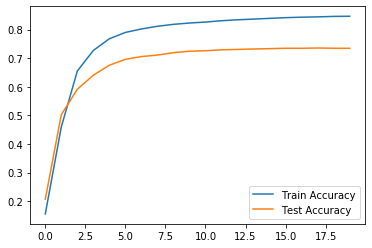

In [116]:
train_acc_plt, = plt.plot(log['train_accuracy'], label="Train Accuracy")
test_acc_plt, = plt.plot(log['test_accuracy'], label="Test Accuracy")
plt.legend(handles = [train_acc_plt, test_acc_plt])

As the number of epochs increases, it will reach a point where it starts to perform better on train data in compare to test data. 

This is the point when we say the model has started **overfitting** the train data. 

Therefore, it is better to limit the number of epochs to a certain number to prevent overfitting. 